# 环境配置
## 安装基础环境与依赖项

In [1]:
# 安装pycocotools
!pip install pycocotools

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 KB 379.3 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0.4-cp37-cp37m-linux_x86_64.whl size=273793 sha256=5f4d4790ecc69485aaf324bba9909cf6c240995ac2d00d828ea5ab600536433b
  Stored in directory: /home/aistudio/.cache/pip/wheels/c0/01/5f/670dfd20204fc9cc6bf843db4e014acb998f411922e3abc49f
Successfully built pycocotools


In [ ]:
%cd work/
!git clone https://gitee.com/paddlepaddle/PaddleDetection

In [5]:
%cd ~
%cd work/PaddleDetection/
!pip install -r requirements.txt

/home/aistudio
/home/aistudio/work/PaddleDetection
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 KB 7.2 MB/s eta 0:00:00
  Created wheel for lap: filename=lap-0.4.0-cp37-cp37m-linux_x86_64.whl size=1593875 sha256=67219039371c53f0c361aa5083f2c486a41b09490325aa6b083d56977fc00224
  Stored in directory: /home/aistudio/.cache/pip/wheels/5c/d0/d2/e331d17a999666b1e2eb99743cfa1742629f9d26c55c657001
Successfully built lap


In [6]:
# 切换到develop分支
!git checkout develop

已经位于 'develop'
您的分支与上游分支 'origin/develop' 一致。


In [7]:
# 编译安装paddledet
!python setup.py install

running install
running bdist_egg
running egg_info
writing paddledet.egg-info/PKG-INFO
writing dependency_links to paddledet.egg-info/dependency_links.txt
writing requirements to paddledet.egg-info/requires.txt
writing top-level names to paddledet.egg-info/top_level.txt
adding license file 'LICENSE' (matched pattern 'LICEN[CS]E*')
reading manifest file 'paddledet.egg-info/SOURCES.txt'
writing manifest file 'paddledet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying ppdet/version.py -> build/lib/ppdet
copying ppdet/model_zoo/MODEL_ZOO -> build/lib/ppdet/model_zoo
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/ppdet
copying build/lib/ppdet/__init__.py -> build/bdist.linux-x86_64/egg/ppdet
creating build/bdist.linux-x86_64/egg/ppdet/utils
copying build/lib/ppdet/utils/__init__.py -> build/bdist.linux-x86_64/egg/ppdet/utils
copying build/lib/ppdet/utils/profiler.py -> build/bdist.linux-x8

## 验证环境

In [7]:
!python ppdet/modeling/tests/test_architectures.py


W0413 11:14:15.290036  1160 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.1, Runtime API Version: 10.1
W0413 11:14:15.293773  1160 device_context.cc:465] device: 0, cuDNN Version: 7.6.
.......
----------------------------------------------------------------------
Ran 7 tests in 3.410s

OK


In [14]:
!export CUDA_VISIBLE_DEVICES=0
# use_gpu参数设置是否使用GPU
# !python tools/infer.py -c configs/ppyolo/ppyolo_test.yml -o use_gpu=true weights=https://paddlemodels.bj.bcebos.com/object_detection/ppyolo.pdparams --infer_img=demo/000000014439.jpg

W0413 11:41:41.140990  3981 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.1, Runtime API Version: 10.1
W0413 11:41:41.144913  3981 device_context.cc:465] device: 0, cuDNN Version: 7.6.
[04/13 11:41:44] ppdet.utils.checkpoint INFO: ['bn2a_branch1_mean', 'bn2a_branch1_offset', 'bn2a_branch1_scale', 'bn2a_branch1_variance', 'bn2a_branch2a_mean', 'bn2a_branch2a_offset', 'bn2a_branch2a_scale', 'bn2a_branch2a_variance', 'bn2a_branch2b_mean', 'bn2a_branch2b_offset', 'bn2a_branch2b_scale', 'bn2a_branch2b_variance', 'bn2a_branch2c_mean', 'bn2a_branch2c_offset', 'bn2a_branch2c_scale', 'bn2a_branch2c_variance', 'bn2b_branch2a_mean', 'bn2b_branch2a_offset', 'bn2b_branch2a_scale', 'bn2b_branch2a_variance', 'bn2b_branch2b_mean', 'bn2b_branch2b_offset', 'bn2b_branch2b_scale', 'bn2b_branch2b_variance', 'bn2b_branch2c_mean', 'bn2b_branch2c_offset', 'bn2b_branch2c_scale', 'bn2b_branch2c_variance', 'bn2c_branch2a_mean', 'bn2c_branch2a_offset', 'bn2c_br

# 数据及模型准备


In [15]:
#下载检测模型
!wget https://bj.bcebos.com/v1/paddledet/models/pipeline/mot_ppyoloe_l_36e_pipeline.zip

#下载属性模型
!wget https://bj.bcebos.com/v1/paddledet/models/pipeline/strongbaseline_r50_30e_pa100k.zip

#下载关键点模型
!wget https://bj.bcebos.com/v1/paddledet/models/pipeline/dark_hrnet_w32_256x192.zip

#下载行为识别模型
!wget https://bj.bcebos.com/v1/paddledet/models/pipeline/STGCN.zip

--2022-04-13 11:49:28--  https://bj.bcebos.com/v1/paddledet/models/pipeline/mot_ppyoloe_l_36e_pipeline.zip
正在解析主机 bj.bcebos.com (bj.bcebos.com)... 100.67.200.6
正在连接 bj.bcebos.com (bj.bcebos.com)|100.67.200.6|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 190820031 (182M) [application/zip]
正在保存至: “mot_ppyoloe_l_36e_pipeline.zip”

mot_ppyoloe_l_36e_p 100%[===================>] 181.98M   115MB/s    in 1.6s    

2022-04-13 11:49:30 (115 MB/s) - 已保存 “mot_ppyoloe_l_36e_pipeline.zip” [190820031/190820031])

--2022-04-13 11:49:30--  https://bj.bcebos.com/v1/paddledet/models/pipeline/strongbaseline_r50_30e_pa100k.zip
正在解析主机 bj.bcebos.com (bj.bcebos.com)... 100.67.200.6
正在连接 bj.bcebos.com (bj.bcebos.com)|100.67.200.6|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 87757409 (84M) [application/zip]
正在保存至: “strongbaseline_r50_30e_pa100k.zip”

strongbaseline_r50_ 100%[===================>]  83.69M   128MB/s    in 0.7s    

2022-04-13 11:49:30 (128 MB/s) - 已保存 “strongbaseline_r50_30e_pa100k.zip” [877574

In [16]:
#解压至./output_inference文件夹
!unzip -d output_inference mot_ppyoloe_l_36e_pipeline.zip
!unzip -d output_inference strongbaseline_r50_30e_pa100k.zip
!unzip -d output_inference dark_hrnet_w32_256x192.zip
!unzip -d output_inference STGCN.zip

Archive:  mot_ppyoloe_l_36e_pipeline.zip
   creating: output_inference/mot_ppyoloe_l_36e_pipeline/
  inflating: output_inference/mot_ppyoloe_l_36e_pipeline/infer_cfg.yml  
  inflating: output_inference/mot_ppyoloe_l_36e_pipeline/model.pdmodel  
  inflating: output_inference/mot_ppyoloe_l_36e_pipeline/model.pdiparams  
  inflating: output_inference/mot_ppyoloe_l_36e_pipeline/model.pdiparams.info  
Archive:  strongbaseline_r50_30e_pa100k.zip
   creating: output_inference/strongbaseline_r50_30e_pa100k/
  inflating: output_inference/__MACOSX/._strongbaseline_r50_30e_pa100k  
  inflating: output_inference/strongbaseline_r50_30e_pa100k/model.pdmodel  
  inflating: output_inference/strongbaseline_r50_30e_pa100k/model.pdiparams.info  
  inflating: output_inference/strongbaseline_r50_30e_pa100k/model.pdiparams  
  inflating: output_inference/strongbaseline_r50_30e_pa100k/infer_cfg.yml  
Archive:  dark_hrnet_w32_256x192.zip
   creating: output_inference/dark_hrnet_w32_256x192/
  inflating: outpu

# 模型预测

## 人员识别

In [8]:
#视频行人属性识别
!python deploy/pphuman/pipeline.py \
    --config deploy/pphuman/config/infer_cfg.yml \
    --model_dir mot=output_inference/mot_ppyoloe_l_36e_pipeline/ attr=output_inference/strongbaseline_r50_30e_pa100k/ \
    --video_file=/home/aistudio/work/属性.mp4 \
    --enable_attr=True \
    --device=gpu

deploy/pphuman/pipeline.py:26: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
-----------  Running Arguments -----------
ACTION:
  batch_size: 1
  coord_size:
  - 384
  - 512
  display_frames: 80
  max_frames: 50
  model_dir: output_inference/STGCN
ATTR:
  batch_size: 8
  model_dir: output_inference/strongbaseline_r50_30e_pa100k/
DET:
  batch_size: 1
  model_dir: output_inference/mot_ppyoloe_l_36e_pipeline/
KPT:
  batch_size: 8
  model_dir: output_inference/dark_hrnet_w32_256x192/
MOT:
  batch_size: 1
  model_dir: output_inference/mot_ppyoloe_l_36e_pipeline/
  tracker_config: deploy/pphuman/config/tracker_config.yml
REID:
  batch_size: 16
  model_dir: output_inference/reid_model/
attr_thresh: 0.5
crop_thresh: 0.5
kpt_thresh: 0.2
visual: true
warmup_frame: 50

------------------------------------------
Attribute Recognition enabled
-----------  Model Co

In [9]:
#图片行人属性识别
!python deploy/pphuman/pipeline.py \
    --config deploy/pphuman/config/infer_cfg.yml \
    --model_dir det=output_inference/mot_ppyoloe_l_36e_pipeline/ attr=output_inference/strongbaseline_r50_30e_pa100k/ \
    --image_dir=/home/aistudio/work/pic \
    --enable_attr=True \
    --device=gpu

deploy/pphuman/pipeline.py:26: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
-----------  Running Arguments -----------
ACTION:
  batch_size: 1
  coord_size:
  - 384
  - 512
  display_frames: 80
  max_frames: 50
  model_dir: output_inference/STGCN
ATTR:
  batch_size: 8
  model_dir: output_inference/strongbaseline_r50_30e_pa100k/
DET:
  batch_size: 1
  model_dir: output_inference/mot_ppyoloe_l_36e_pipeline/
KPT:
  batch_size: 8
  model_dir: output_inference/dark_hrnet_w32_256x192/
MOT:
  batch_size: 1
  model_dir: output_inference/mot_ppyoloe_l_36e_pipeline/
  tracker_config: deploy/pphuman/config/tracker_config.yml
REID:
  batch_size: 16
  model_dir: output_inference/reid_model/
attr_thresh: 0.5
crop_thresh: 0.5
kpt_thresh: 0.2
visual: true
warmup_frame: 50

------------------------------------------
Found 3 inference images in total.
Attribute Recogn

检测结果示意：
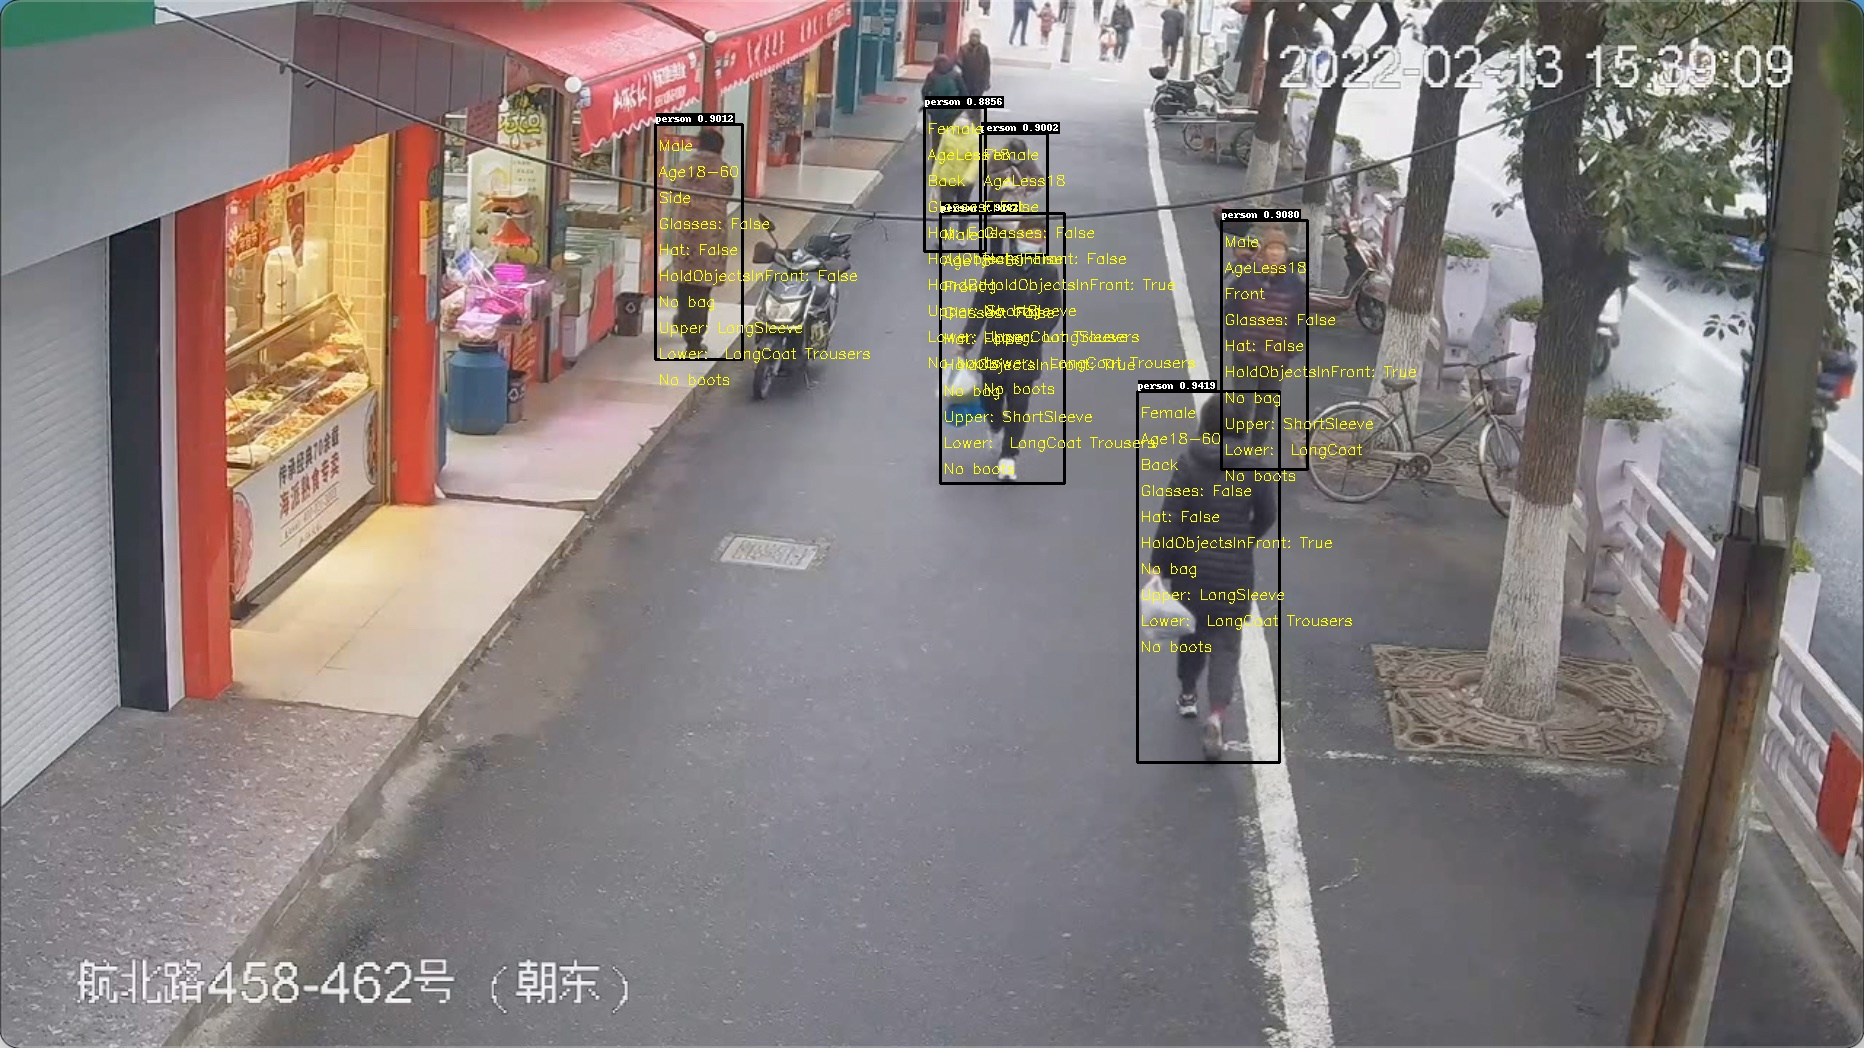

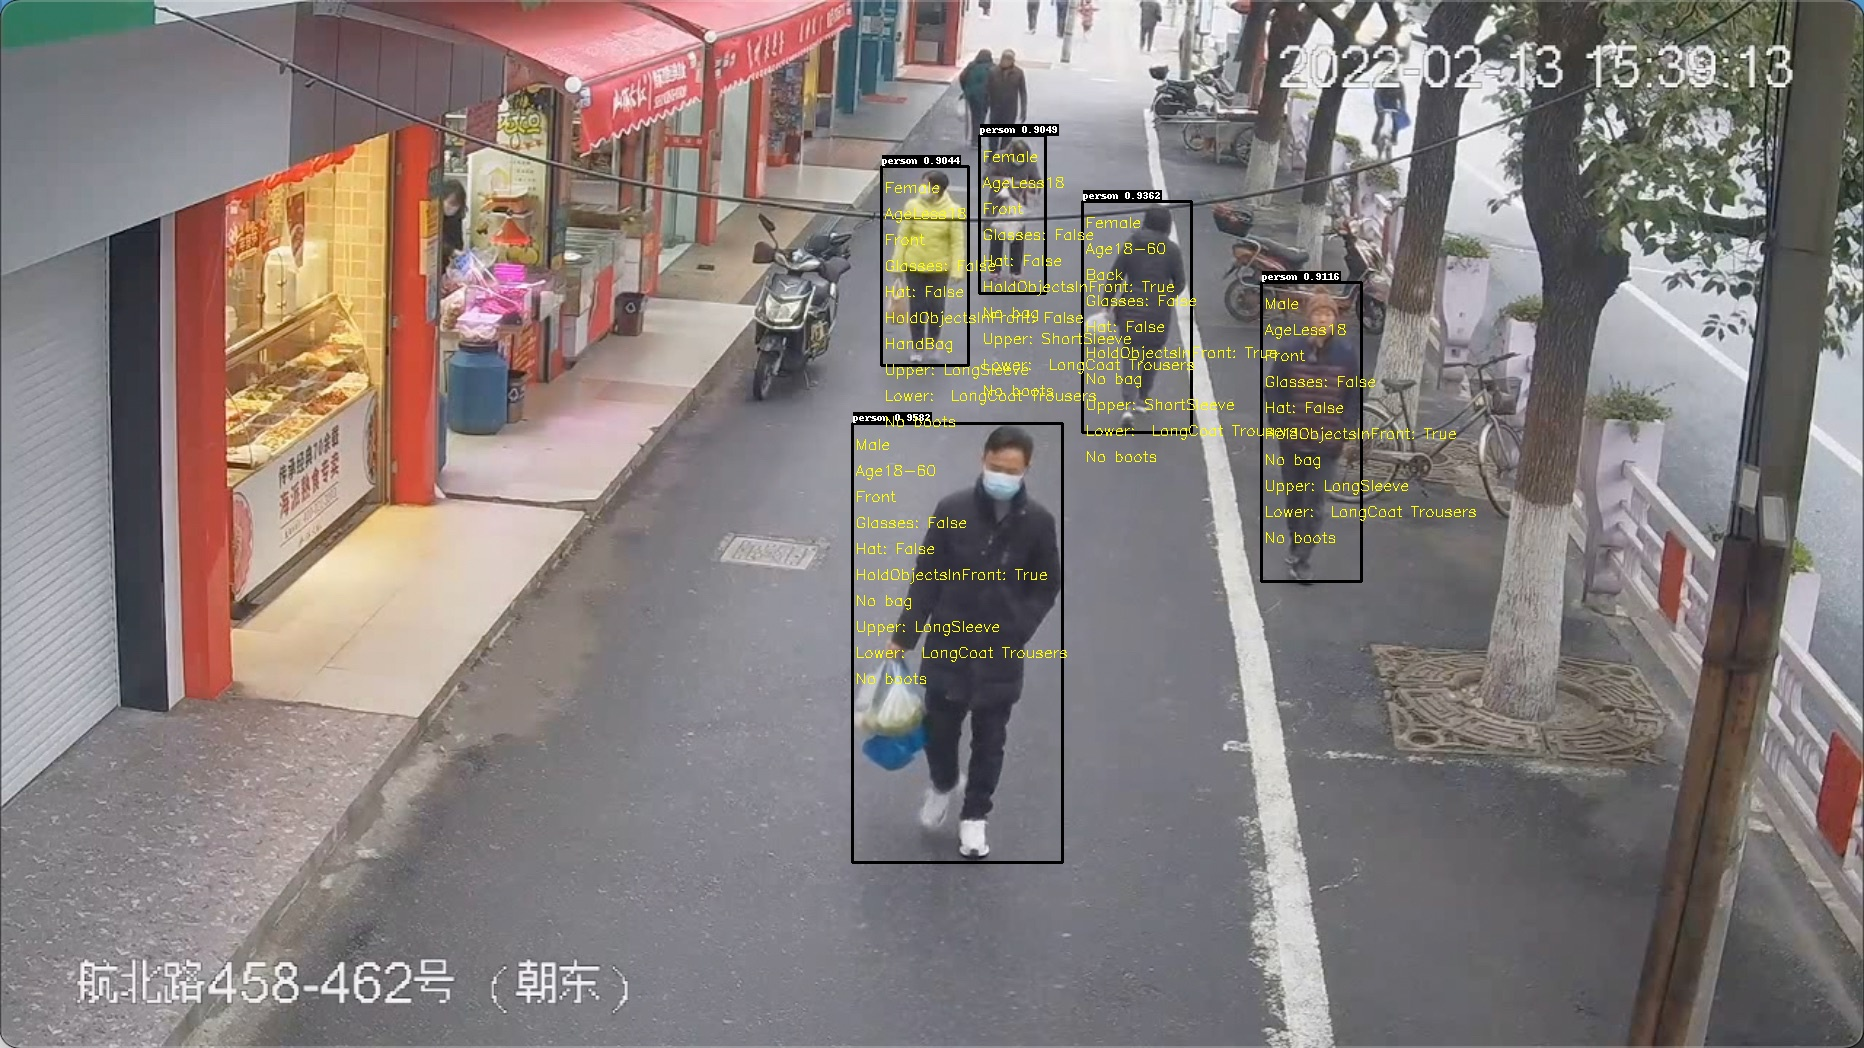

## 摔倒检测

In [10]:
#摔倒检测
!python deploy/pphuman/pipeline.py \
    --config deploy/pphuman/config/infer_cfg.yml \
    --model_dir mot=output_inference/mot_ppyoloe_l_36e_pipeline/ kpt=output_inference/dark_hrnet_w32_256x192/ action=output_inference/STGCN \
    --video_file=/home/aistudio/work/摔倒.mp4 \
    --enable_action=True \
    --device=gpu

deploy/pphuman/pipeline.py:26: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
-----------  Running Arguments -----------
ACTION:
  batch_size: 1
  coord_size:
  - 384
  - 512
  display_frames: 80
  max_frames: 50
  model_dir: output_inference/STGCN
ATTR:
  batch_size: 8
  model_dir: output_inference/strongbaseline_r50_30e_pa100k/
DET:
  batch_size: 1
  model_dir: output_inference/mot_ppyoloe_l_36e_pipeline/
KPT:
  batch_size: 8
  model_dir: output_inference/dark_hrnet_w32_256x192/
MOT:
  batch_size: 1
  model_dir: output_inference/mot_ppyoloe_l_36e_pipeline/
  tracker_config: deploy/pphuman/config/tracker_config.yml
REID:
  batch_size: 16
  model_dir: output_inference/reid_model/
attr_thresh: 0.5
crop_thresh: 0.5
kpt_thresh: 0.2
visual: true
warmup_frame: 50

------------------------------------------
Action Recognition enabled
-----------  Model Confi